In [2]:
%load_ext autoreload
%autoreload 2
from astropy import units as u
from astropy import constants as const
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve, root

from sympy.polys.polytools import nroots
from sympy import Symbol, nsolve


from cluster import Cluster, fun, c
#from load_galweight_data import load_clusters
from load_mcxc_data import load_clusters


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
clusters = load_clusters(nrows=5)

In [4]:
test_cluster = clusters[1]

In [5]:
log_m_chi = -4
log_sigma_0 = -20
predicted_temperatures = [test_cluster.pred_T_b([s_0, log_m_chi]) for s_0 in log_sigma_0]
#plt.plot(log_sigma_0, self.virial_temperature(self.m_chi, f_chi=f_chi, m_psi=m_psi),
#                   label=f'T_b = pred_T_b, fx={f_chi}')
#plt.xlabel(r'$m_{\chi} (GeV)$')
#plt.ylabel(r'$T_{\chi} (GeV)$')

TypeError: 'int' object is not iterable

In [6]:
predicted_temperatures

NameError: name 'predicted_temperatures' is not defined

In [8]:
Tbs = np.logspace(-4, -8)
plt.loglog(Tbs, func(Tbs,[log_sigma_0, log_m_chi], test_cluster ))

TypeError: 'Cluster' object is not subscriptable

In [ ]:
sigma0s = np.linspace(-30,-10)
T_bs = [test_cluster.pred_T_b_small_m(np.power(10,s0)*u.cm**2, 1e-6*u.GeV).value for s0 in sigma0s]
plt.loglog(np.power(10,sigma0s), T_bs)

plt.xlabel('sigma0 (cm^2)')
plt.ylabel('Temperature (GeV)')

In [ ]:
x0 = 1e-6 * u.GeV
p0=[-20, -6]
root(func, x0, (p0,test_cluster))

In [ ]:
from sympy import Symbol, nsolve


In [ ]:
x0=1e-6

T_b = Symbol('T_b')
nsolve(f(T_b, p0, test_cluster), [p0, test_cluster], x0)

In [ ]:
def f(T_b, p0, cluster):
    
    #function used to solve for T_b
    sigma0 = p0[0]*u.cm**2
    m_chi=
    #T_b = T_b*u.GeV
    n=0
    
    leading_factors = (cluster.norm * 4*np.pi *const.c ** -3).to(u.s**3/u.cm**3)
    
    
    V=cluster.volume.to(u.cm**3)
    x = (3*const.c*c(n)*V*cluster.rho_dm*cluster.rho_b*sigma0/(cluster.m_b+m_chi)**2).to(1/u.s)
    gm2 = ((const.G * cluster.bh_mass()) ** 2).to(u.cm**6/u.s**4)
    frac = ((cluster.mu * cluster.m_b) ** (5 / 2) / cluster.adiabatic_idx ** (3 / 2)).to(u.GeV**(5/2))
    nb = (2 * cluster.n_e).to(u.cm ** (-3)) # baryon number density
    D = (cluster.epsilon*leading_factors*gm2*frac*(1/nb**(2/3))**(-3/2)) # removed k_B from original function because we are working in GeV here
    T_chi = cluster.virial_temperature(m_chi)
    
    numerator = D*T_b**(-3/2)
    denominator = (T_b - T_chi)*(T_chi/m_chi + T_b/cluster.m_b)**(1/2)
    
    return ((numerator/denominator - x)*const.hbar).to(u.GeV, equivalencies=u.temperature_energy())

In [72]:
def poly_T_b(T_b, p0, cluster, f_chi=1, n=0):
    sigma0=np.float_power(10, p0[0])*u.cm**2
    m_chi = 1e-4*u.GeV
    
    norm=cluster.norm
    bh_mass=cluster.bh_mass()
    mu=cluster.mu
    m_b=cluster.m_b
    nb=(2 * cluster.n_e).to(u.m ** (-3))
    gamma=cluster.adiabatic_idx
    rho_chi=cluster.rho_dm * f_chi
    rho_b = cluster.rho_b
    V=cluster.volume
    efficiency=cluster.epsilon
    T_chi = cluster.virial_temperature(m_chi)

    
    accretion_factors=(norm*4*np.pi*(const.G*bh_mass)**2)
    plasma_entropy_factors=(((mu*m_b)**(5/2)*nb)/gamma**(3/2)) #no k_b because T_b in GeV
    cooling_factors=3*rho_chi*rho_b*V*c(n)*const.c 
    
    B=(efficiency*accretion_factors*plasma_entropy_factors)/(cooling_factors)
    C=(B**2 * (m_chi + m_b)**4)/(sigma0**2)
    #print(C)
    inside=(T_b**2*T_chi/m_chi)+(T_b**3/m_b)-(T_chi**3/m_chi)-(T_chi**2*T_b/m_b)-(2*T_b*T_chi**2/m_chi)-(2*T_b**2*T_chi/m_b)
    #print(T_b**3*inside)
    #print(C*1/const.c**6)
    return T_b**3*(inside) - C*(1/const.c**6)

In [74]:
p0=[-20]
T_b=Symbol('T_b')
nroots(poly_T_b(T_b, p0, test_cluster))

RecursionError: maximum recursion depth exceeded in comparison

In [57]:
T_bs = np.logspace(-8, -4) * u.GeV

[9.73656561e-47 2.50630793e-46 6.45053823e-46 1.66026209e-45
 4.27426774e-45 1.10087571e-44 2.83725386e-44 7.31881415e-44
 1.89005836e-43 4.88791547e-43 1.26626110e-42 3.28721771e-42
 8.55486469e-42 2.23291320e-41 5.84817476e-41 1.53778302e-40
 4.06210244e-40 1.07859174e-39 2.88065513e-39 7.74338343e-39
 2.09624587e-38 5.71833377e-38 1.57260993e-37 4.36171820e-37
 1.22034448e-36 3.44456364e-36 9.80809151e-36 2.81669525e-35
 8.15545272e-35 2.37962219e-34 6.99329025e-34 2.06874213e-33
 6.15613489e-33 1.84166845e-32 5.53539533e-32 1.67057648e-31
 5.05976151e-31 1.53718620e-30 4.68235969e-30 1.42947393e-29
 4.37233441e-29 1.33951735e-28 4.10933186e-28 1.26208330e-27
 3.87988504e-27 1.19370246e-26 3.67504493e-26 1.13206294e-25
 3.48882828e-25 1.07561296e-24] GeV5
6.921696365585761e+118 cm8 GeV5 / (m2 Mpc6)


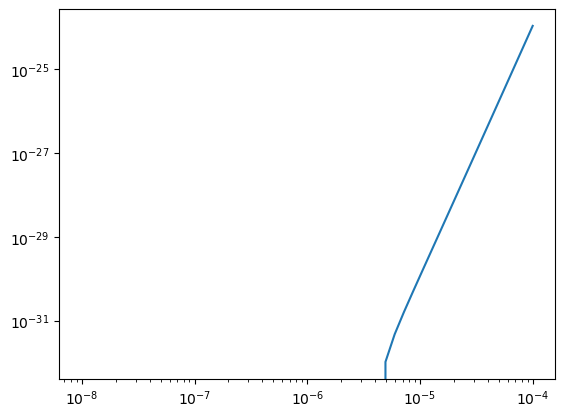

In [73]:
plt.loglog(T_bs, poly_T_b(T_bs, p0, test_cluster))

In [78]:
T_b = Symbol('T_b')
x0=1e-5
nsolve(poly_T_b(T_b, p0, test_cluster), [p0, test_cluster], x0)

RecursionError: maximum recursion depth exceeded in comparison

In [105]:
# try np.poly1D
cluster=test_cluster

sigma0=np.float_power(10, p0[0])*u.cm**2
m_chi = 1e-4*u.GeV
f_chi=1
n=0
    
norm=cluster.norm
bh_mass=cluster.bh_mass()
mu=cluster.mu
m_b=cluster.m_b
nb=(2 * cluster.n_e).to(u.m ** (-3))
gamma=cluster.adiabatic_idx
rho_chi=cluster.rho_dm * f_chi
rho_b = cluster.rho_b
V=cluster.volume
efficiency=cluster.epsilon
T_chi = cluster.virial_temperature(m_chi)
accretion_factors=(norm*4*np.pi*(const.G*bh_mass)**2)
plasma_entropy_factors=(((mu*m_b)**(5/2)*nb)/gamma**(3/2)) #no k_b because T_b in GeV
cooling_factors=3*rho_chi*rho_b*V*c(n)*const.c 
B=(efficiency*accretion_factors*plasma_entropy_factors)/(cooling_factors)
C=(B**2 * (m_chi + m_b)**4)/(sigma0**2) *(1/const.c**6)



In [126]:
sigma0=1e-20*u.cm**2
m_chi=1e-4*u.GeV

other_c = ((B * (m_chi + m_b)**2)/(sigma0) *(1/const.c**3)).to(u.GeV**(5/2))
def fun(T_b):
    T_b=T_b*u.GeV
    #print(other_c)
    #print(T_b, T_chi, m_b, m_chi)
    #print((T_b-T_chi)*(T_chi/m_chi + T_b/m_b)**(1/2) * T_b**(3/2))
    return (T_b-T_chi)*(T_chi/m_chi + T_b/m_b)**(1/2) * T_b**(3/2) - other_c

In [139]:

x0=1e-5
solution = root(fun,x0).x
solution


array([4.2852027e-06])

2.6309116985535187e+59 cm4 GeV(5/2) / (m Mpc3)
[9.86837559e-24 1.58323902e-23 2.53990819e-23 4.07476019e-23
 6.53793006e-23 1.04924183e-22 1.68443215e-22 2.70534959e-22
 4.34750098e-22 6.99138585e-22 1.12528521e-21 1.81307140e-21
 2.92487314e-21 4.72537454e-21 7.64733981e-21 1.24007422e-20
 2.01546629e-20 3.28419258e-20 5.36717409e-20 8.79965034e-20
 1.44784187e-19 2.39130387e-19 3.96561472e-19 6.60433066e-19
 1.10469204e-18 1.85595358e-18 3.13178729e-18 5.30725473e-18
 9.03075455e-18 1.54260241e-17 2.64448299e-17 4.54834270e-17
 7.84610406e-17 1.35708086e-16 2.35274209e-16 4.08726862e-16
 7.11320006e-16 1.23983313e-15 2.16387608e-15 3.78083844e-15
 6.61236297e-15 1.15737520e-14 2.02714870e-14 3.55258117e-14
 6.22887232e-14 1.09256691e-13 1.91704067e-13 3.36461430e-13
 5.90663041e-13 1.03711762e-12] GeV(5/2)


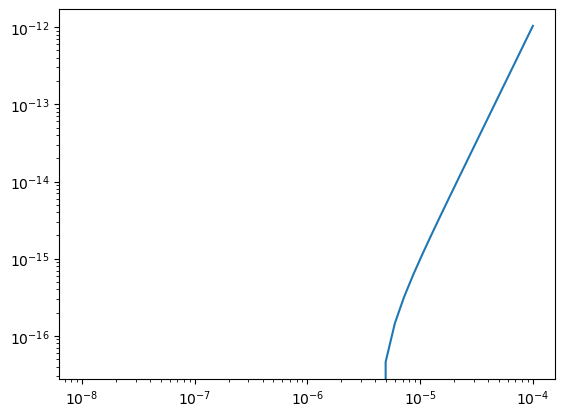

In [109]:
plt.loglog(T_bs, fun(T_bs))

In [90]:
c6 = (1/m_b).to(1/u.GeV).value
c5 = (T_chi/m_chi - 2*T_chi/m_b).to(u.GeV/u.GeV).value
c4 = (-T_chi**2/m_b - 2*T_chi**2/m_chi).to(u.GeV).value
c3 = (-T_chi**3/m_chi).value
c2 = 0
c1 = 0
c0 = (-C).to(u.GeV**5).value

In [91]:
c6, c5, c4, c3, c0

(1.0657889247888948,
 9.82405206311776e-07,
 -1.9311660386019664e-16,
 -9.487454704266106e-27,
 -8.01879798964887e-33)

In [93]:
np.poly1d([c6, c5, c4, c3, c2, c1, c0]).roots

array([-4.59494287e-06+0.00000000e+00j, -2.37287948e-06+3.82096134e-06j,
       -2.37287948e-06-3.82096134e-06j,  2.06686787e-06+3.82308518e-06j,
        2.06686787e-06-3.82308518e-06j,  4.28520270e-06+0.00000000e+00j])

In [95]:
coefficients=[6, 5, 4, 3, 0, 0, 1]
np.roots(coefficients)

array([-0.74951283+0.27856512j, -0.74951283-0.27856512j,
       -0.06859525+0.90061214j, -0.06859525-0.90061214j,
        0.40144142+0.39796191j,  0.40144142-0.39796191j])

In [123]:
test_cluster

In [140]:
p0=[-20, -4]
test_cluster.pred_T_b(p0)

array([4.2852027e-06])

In [14]:
m_chi = -1
sigma_0s = np.linspace(-40, -10)
p0s = [(s0, m_chi) for s0 in sigma_0s]


In [24]:
pred_Tbs = [test_cluster.pred_T_b(p).value for p in p0s]
pred_Tbs

[0.12801,
 0.12801,
 0.12801,
 0.12801,
 0.12801,
 0.12801,
 1.3108125000720772,
 0.8193301142667839,
 0.5121264969834578,
 0.3201072808373592,
 0.20008467272028005,
 0.12506391829613353,
 0.07817180619619145,
 0.04886164803984911,
 0.030541181490915476,
 0.019089878745759334,
 0.011932182504943253,
 0.007458227305082236,
 0.004661758379465478,
 0.002913810961872375,
 0.0018212473604069758,
 0.0011383348212056859,
 0.0007114768134223329,
 0.00044466703257732885,
 0.0002778962470050366,
 0.00017365538673871944,
 0.00010849923169856918,
 6.777325515369287e-05,
 4.23176158518805e-05,
 2.6406979949000646e-05,
 1.6462807975604753e-05,
 1.0248477424058999e-05,
 6.366202001606335e-06,
 3.942575587546776e-06,
 2.43197727679272e-06,
 1.4935759349179437e-06,
 9.142736469007123e-07,
 5.604150327125318e-07,
 3.477451268277632e-07,
 2.2310426354817342e-07,
 1.5342638493969825e-07,
 1.1845149854929046e-07,
 1.042722303732689e-07,
 9.983174351463889e-08,
 9.865206035324765e-08,
 9.835729403408251e-08

Text(0, 0.5, 'predicted T_b (GeV)')

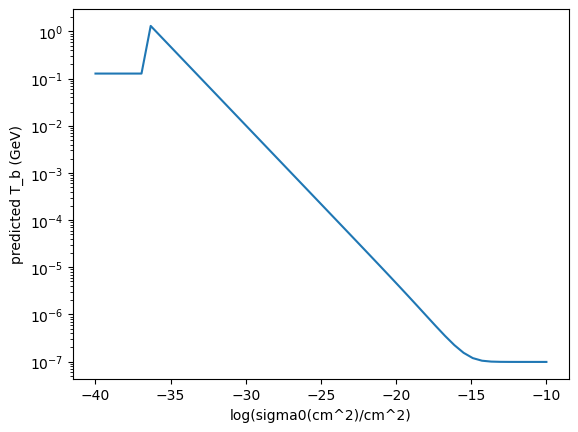

In [27]:
plt.plot(sigma_0s, pred_Tbs)
plt.yscale('log')
plt.xlabel('log(sigma0(cm^2)/cm^2)')
plt.ylabel('predicted T_b (GeV)')

In [32]:
m_chis = np.linspace(-10, 0)
sigma_0 = -20
p0ms = [(sigma_0, m_chi) for m in m_chis]
m_chis

array([-10.        ,  -9.79591837,  -9.59183673,  -9.3877551 ,
        -9.18367347,  -8.97959184,  -8.7755102 ,  -8.57142857,
        -8.36734694,  -8.16326531,  -7.95918367,  -7.75510204,
        -7.55102041,  -7.34693878,  -7.14285714,  -6.93877551,
        -6.73469388,  -6.53061224,  -6.32653061,  -6.12244898,
        -5.91836735,  -5.71428571,  -5.51020408,  -5.30612245,
        -5.10204082,  -4.89795918,  -4.69387755,  -4.48979592,
        -4.28571429,  -4.08163265,  -3.87755102,  -3.67346939,
        -3.46938776,  -3.26530612,  -3.06122449,  -2.85714286,
        -2.65306122,  -2.44897959,  -2.24489796,  -2.04081633,
        -1.83673469,  -1.63265306,  -1.42857143,  -1.2244898 ,
        -1.02040816,  -0.81632653,  -0.6122449 ,  -0.40816327,
        -0.20408163,   0.        ])

In [31]:
pred_Tbs = [test_cluster.pred_T_b(p).value for p in p0ms]
pred_Tbs

[4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
 4.6272136948712025e-06,
